In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the experiment from file
df = pd.read_feather('../../results/tabular-1.feather')

# Update the font to be same as in thesis
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': '\\usepackage{libertine}'
})

Plotting fcnet-naval
Zoomed y-axis limits: 2.9708326367914452e-05 - 0.00028774705060784656


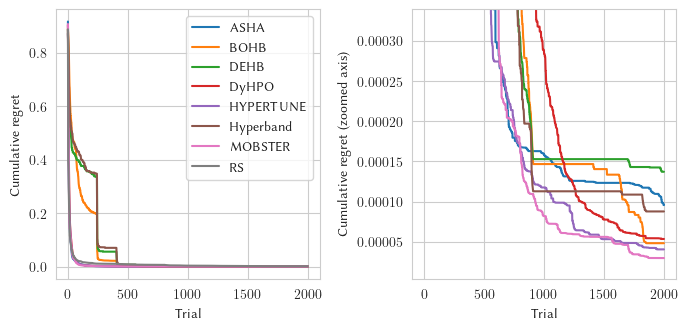

Plotting fcnet-parkinsons
Zoomed y-axis limits: 0.004968461333565963 - 0.011585551386866701


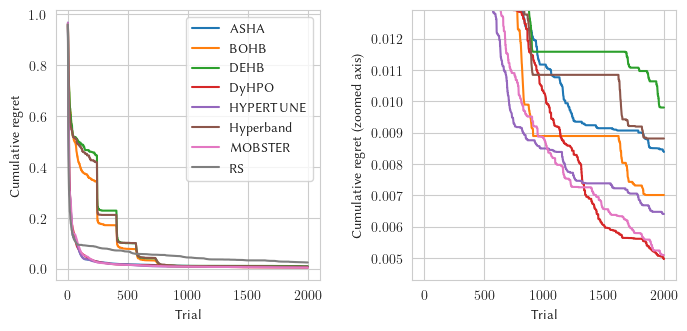

Plotting fcnet-protein
Zoomed y-axis limits: 0.026914302493552755 - 0.13273294446101416


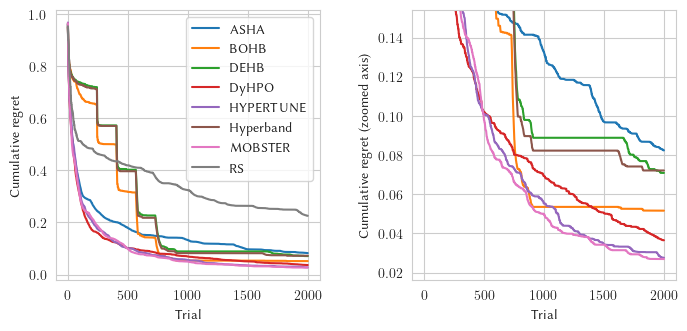

Plotting fcnet-slice
Zoomed y-axis limits: 0.006477601230599341 - 0.022603193929627945


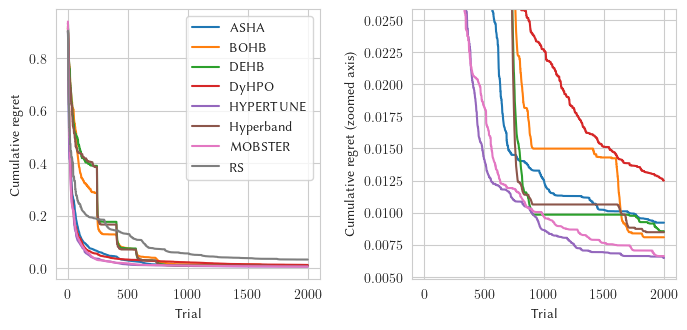

Plotting lcbench-Fashion-MNIST
Zoomed y-axis limits: 0.01683339395825958 - 0.09909601377074277


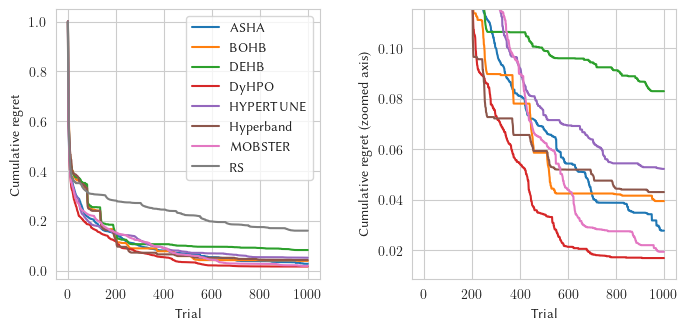

Plotting lcbench-airlines
Zoomed y-axis limits: 0.05933664758514527 - 0.31399973921489593


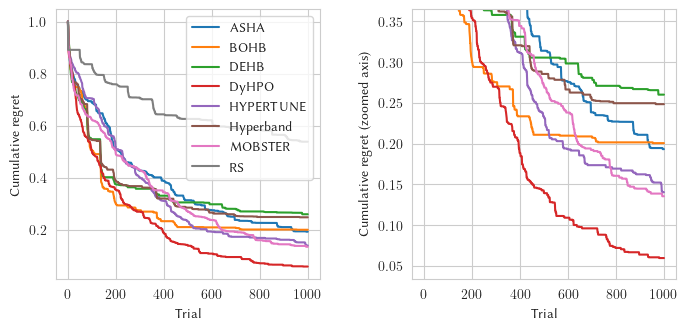

Plotting lcbench-albert
Zoomed y-axis limits: 0.07104949913106558 - 0.17448412255435336


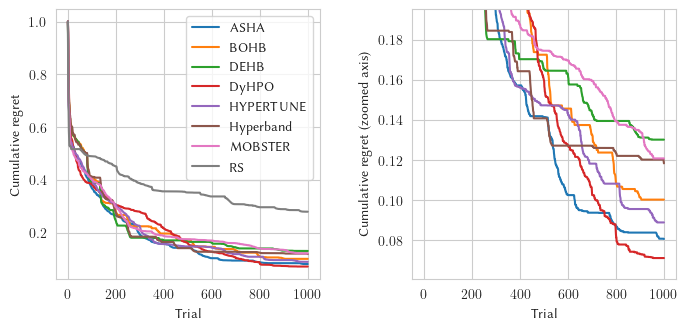

Plotting lcbench-christine
Zoomed y-axis limits: 0.07242374890083464 - 0.1284842519928015


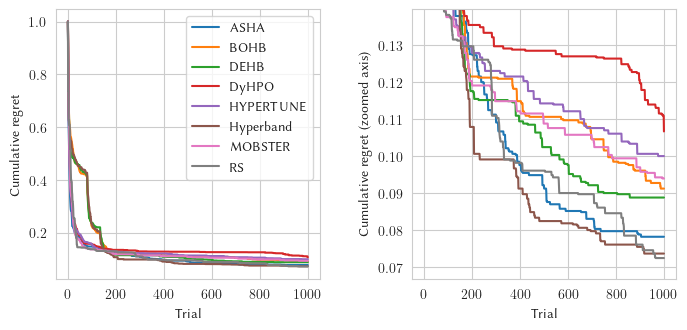

Plotting lcbench-covertype
Zoomed y-axis limits: 0.0879362246028811 - 0.390262412674958


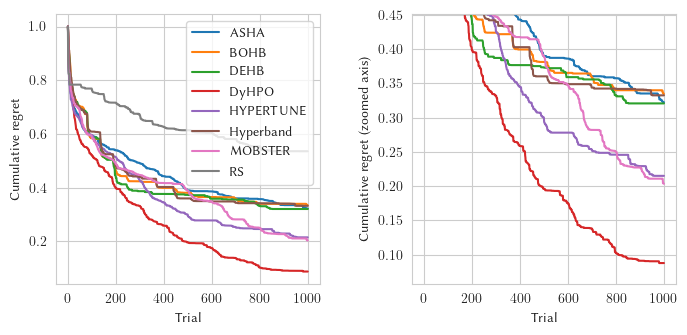

Plotting lcbench-dionis
Zoomed y-axis limits: 0.07148906579331553 - 0.1975056067458819


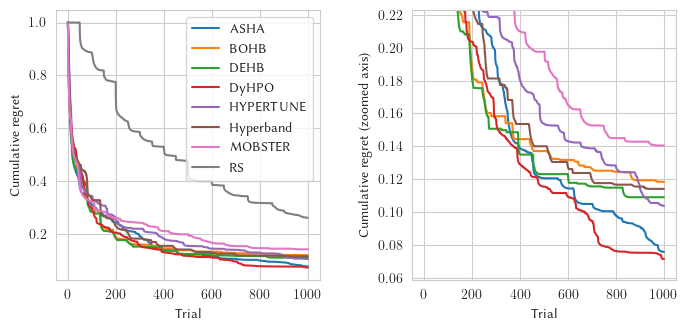

Plotting lcbench-helena
Zoomed y-axis limits: 0.08173933749624279 - 0.18566243900335744


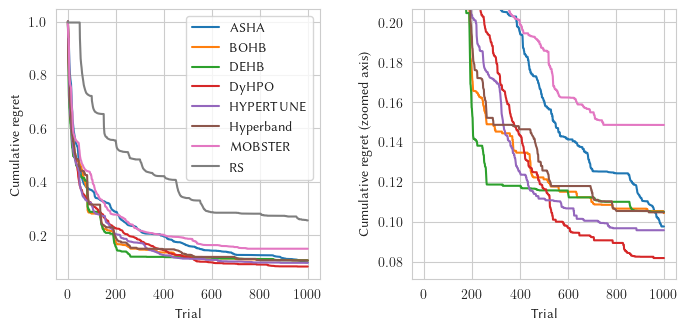

Plotting lcbench-higgs
Zoomed y-axis limits: 0.036891631659231046 - 0.16566642355368602


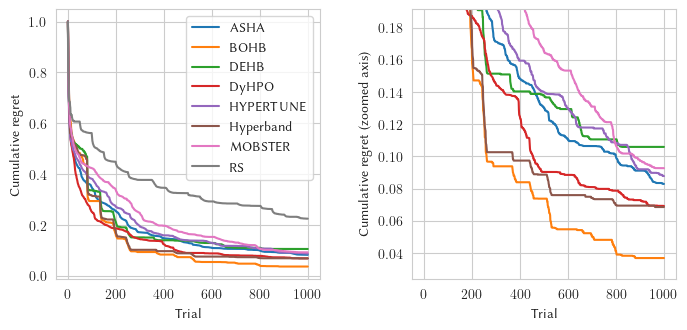

Plotting nas201-ImageNet16-120
Zoomed y-axis limits: 0.01449837062432338 - 0.054018636201590434


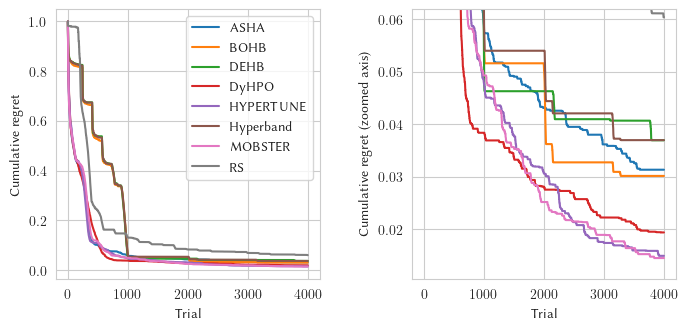

Plotting nas201-cifar10
Zoomed y-axis limits: 0.0038815045248868783 - 0.016548831400829564


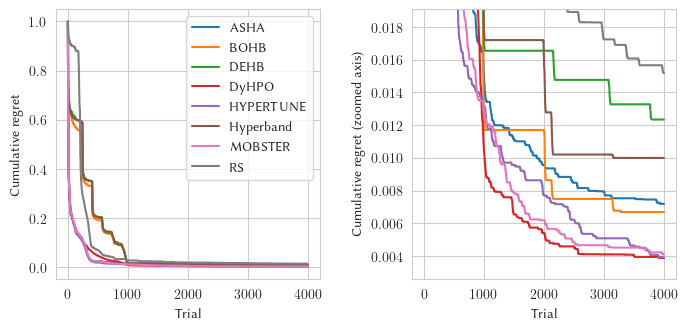

Plotting nas201-cifar100
Zoomed y-axis limits: 0.0074607152298428615 - 0.041822099182454595


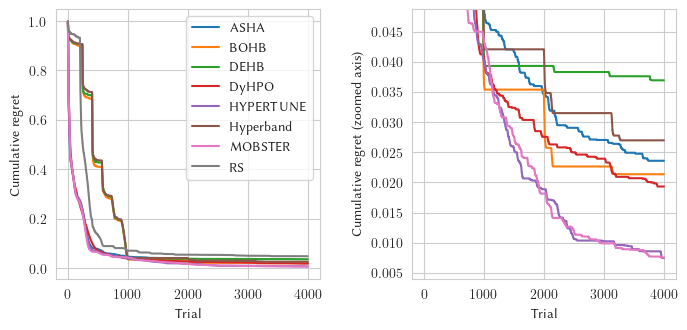

In [11]:
# Double plots
benchmark_names = df.index.get_level_values('benchmark').unique()
logx = False
logy = False
save = False
output_name = 'plot'

for benchmark_name in benchmark_names:
    print(f'Plotting {benchmark_name}')
    tmp = df.loc[(benchmark_name, slice(None), slice(None), slice(None))]
    budget = tmp['max_num_evaluations'].iloc[0]
    tmp = tmp.filter(['regret'])

    # Limit the trials
    if budget is not None:
        tmp = tmp[tmp.index.get_level_values('trial') <= budget]

    # Set properties of the plot
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))
    fig.subplots_adjust(wspace=0.35)

    sns.lineplot(data=tmp, x='trial', y='regret', hue='algorithm', palette="tab10", dashes=False, ci=None, ax=axes[0])

    axes[0].set_xlabel('Trial')
    axes[0].set_ylabel('Cumulative regret')

    if logx:
        axes[0].set_xscale('log')
    if logy:
        axes[0].set_yscale('log')

    mid_budget = budget // 2 if budget is not None else None
    if mid_budget is not None:
        tmp_zoomed = tmp[tmp.index.get_level_values('trial') == mid_budget]
        tmp_zoomed = tmp_zoomed.groupby(['algorithm']).mean()
        tmp_zoomed = tmp_zoomed[~(tmp_zoomed.index.get_level_values('algorithm')=='RS')]

    sns.lineplot(data=tmp, x='trial', y='regret', hue='algorithm', palette="tab10", dashes=False, ci=None, ax=axes[1], legend=False)

    axes[1].set_xlabel('Trial')
    axes[1].set_ylabel('Cumulative regret (zoomed axis)')

    if logx:
        axes[1].set_xscale('log')
    if logy:
        axes[1].set_yscale('log')

    # Adjust the y-axis limits to zoom in
    min_y = tmp[tmp.index.get_level_values('trial')==budget].groupby(['algorithm']).mean()['regret'].min()
    max_y = tmp_zoomed['regret'].max()
    spacing = (max_y - min_y) * 0.1
    axes[1].set_ylim(min_y-spacing, max_y+2*spacing)
    print(f'Zoomed y-axis limits: {min_y} - {max_y}')

    axes[0].legend()
    plt.rcParams['savefig.format'] = 'pdf'
    if save and output_name is not None:
        plt.savefig(f'../../thesis/img/tabular_exp/{benchmark_name}_{output_name}', bbox_inches='tight')
    plt.show()

Plotting fcnet-naval


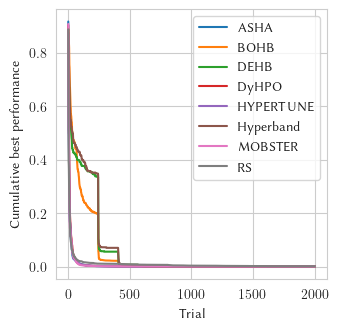

Plotting fcnet-parkinsons


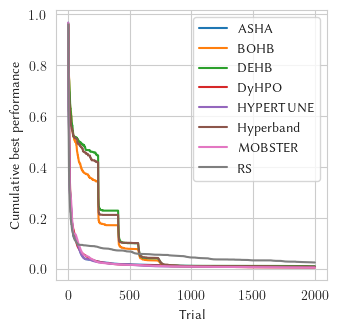

Plotting fcnet-protein


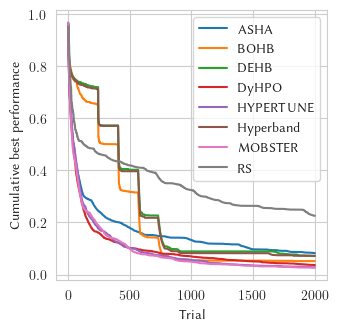

Plotting fcnet-slice


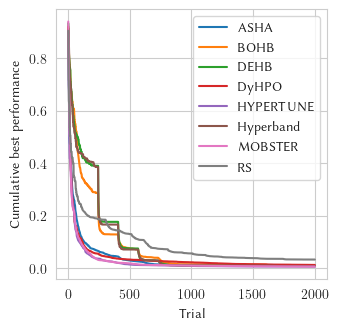

Plotting lcbench-Fashion-MNIST


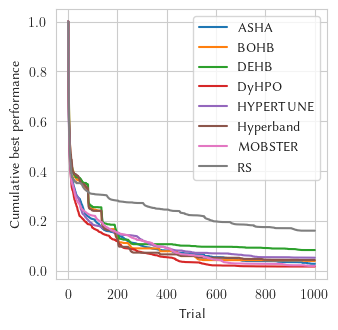

Plotting lcbench-airlines


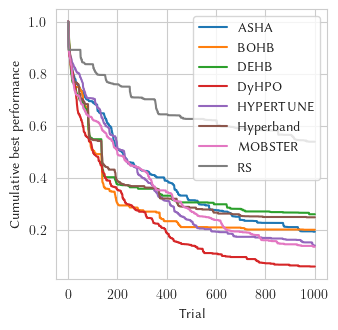

Plotting lcbench-albert


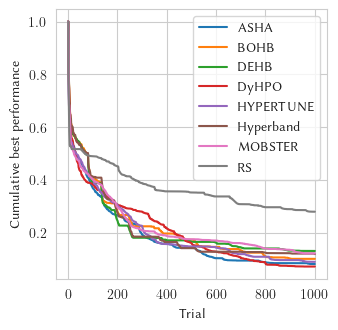

Plotting lcbench-christine


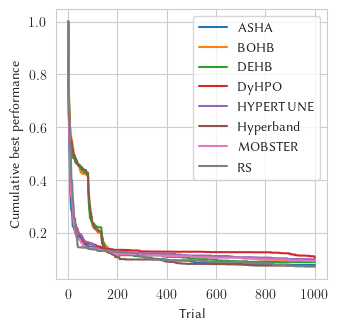

Plotting lcbench-covertype


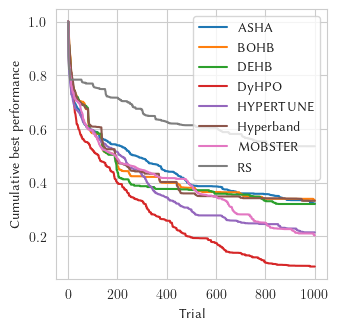

Plotting lcbench-dionis


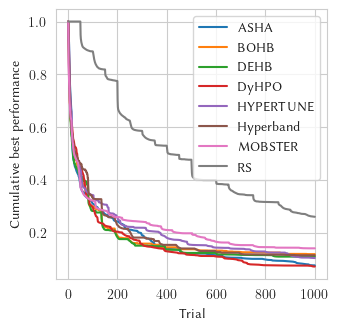

Plotting lcbench-helena


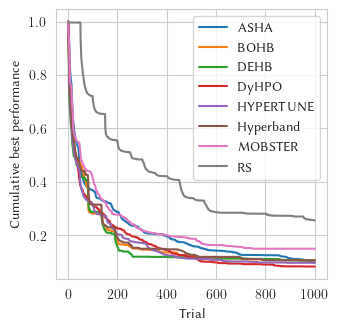

Plotting lcbench-higgs


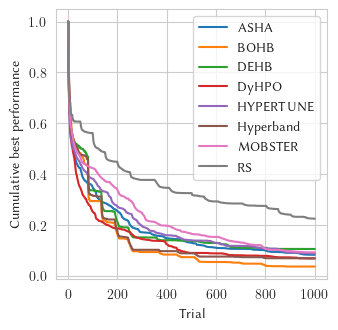

Plotting nas201-ImageNet16-120


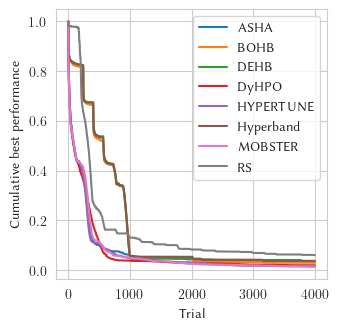

Plotting nas201-cifar10


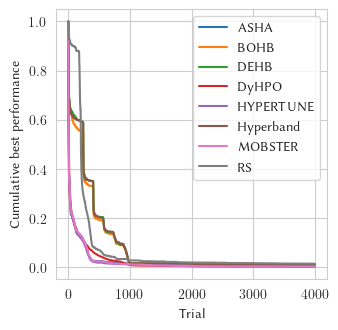

Plotting nas201-cifar100


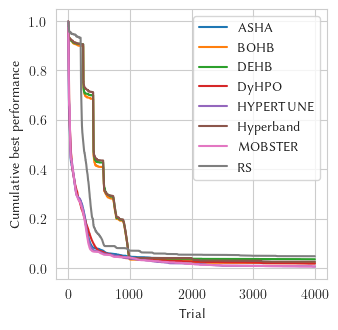

In [12]:
# Simple plots
benchmark_names = df.index.get_level_values('benchmark').unique()
logx = False
logy = False
save = False
output_name = ''

# Disable the font to save space
plt.rcParams.update({
    "text.usetex": True,
})

for benchmark_name in benchmark_names:
    print(f'Plotting {benchmark_name}')
    tmp = df.loc[(benchmark_name, slice(None), slice(None), slice(None))]
    budget = tmp['max_num_evaluations'].iloc[0]
    tmp = tmp.filter(['regret'])

    # Limit the trials
    if budget is not None:
        tmp = tmp[tmp.index.get_level_values('trial') <= budget]

    # Set properties of the plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(3.5, 3.5))

    sns.lineplot(data=tmp, x='trial', y='regret', hue='algorithm', palette="tab10", dashes=False, ci=None)

    plt.xlabel('Trial')
    plt.ylabel('Cumulative best performance')

    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')

    plt.legend()
    plt.rcParams['savefig.format'] = 'pdf'
    if save and output_name is not None:
        plt.savefig(f'../thesis/img/{output_name}', bbox_inches='tight')
    plt.show()